In [35]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [36]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [37]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [38]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [39]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [40]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [41]:
train_data.targets.size()

torch.Size([60000])

In [42]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [43]:
from torch.utils.data import DataLoader

loaders = {

    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers = 1),

    'test' : DataLoader(test_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers = 1)
}

In [44]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x125b98cd0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x125d53750>}

In [50]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1 = nn.Conv2d(1,10,kernel_size = 5)
        self.conv2 = nn.Conv2d(10,20,kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        x = self.fc2(x)

        return F.softmax(x)


In [51]:
import torch

device = torch.device('cpu')

model = CNN().to(device)

optimiser = optim.Adam(model.parameters(),lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders['train']):
        data, target = data.to(device),target.to(device)
        optimiser.zero_grad()
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimiser.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch}[{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100.*batch_idx/len(loaders["train"]):.0f}%)] \t {loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data,target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output,target).item()
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy{correct}/{len(loaders["test"].dataset)}({100.*correct/len(loaders["test"].dataset):.0f}%\n)')

In [52]:
for epoch in range(1,11):
    train(epoch)
    test()

/var/folders/z5/9j56pcy9201dt_t1pww9k6g80000gn/T/ipykernel_3927/3199859990.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1[0/60000 (0%)] 	 2.302145
Train Epoch: 1[2000/60000 (3%)] 	 2.284935
Train Epoch: 1[4000/60000 (7%)] 	 2.178335
Train Epoch: 1[6000/60000 (10%)] 	 1.942323
Train Epoch: 1[8000/60000 (13%)] 	 2.025531
Train Epoch: 1[10000/60000 (17%)] 	 1.902502
Train Epoch: 1[12000/60000 (20%)] 	 1.796666
Train Epoch: 1[14000/60000 (23%)] 	 1.832076
Train Epoch: 1[16000/60000 (27%)] 	 1.707885
Train Epoch: 1[18000/60000 (30%)] 	 1.822477
Train Epoch: 1[20000/60000 (33%)] 	 1.700879
Train Epoch: 1[22000/60000 (37%)] 	 1.711403
Train Epoch: 1[24000/60000 (40%)] 	 1.767615
Train Epoch: 1[26000/60000 (43%)] 	 1.679398
Train Epoch: 1[28000/60000 (47%)] 	 1.620232
Train Epoch: 1[30000/60000 (50%)] 	 1.669435
Train Epoch: 1[32000/60000 (53%)] 	 1.662492
Train Epoch: 1[34000/60000 (57%)] 	 1.622432
Train Epoch: 1[36000/60000 (60%)] 	 1.733882
Train Epoch: 1[38000/60000 (63%)] 	 1.695551
Train Epoch: 1[40000/60000 (67%)] 	 1.651671
Train Epoch: 1[42000/60000 (70%)] 	 1.683404
Train Epoch: 1[44000/

In [53]:
device

device(type='cpu')

/var/folders/z5/9j56pcy9201dt_t1pww9k6g80000gn/T/ipykernel_3927/3199859990.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 0


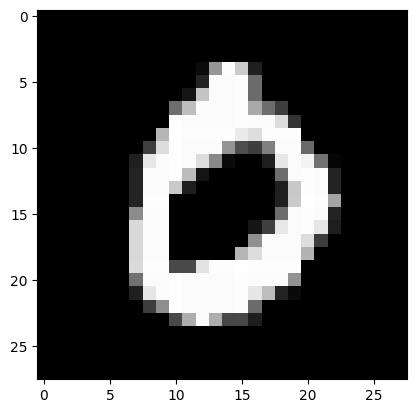

In [57]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[3] 

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1,keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image,cmap='gray')
plt.show()
